## 1. Importación de los datos

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

datos = pd.read_csv('0_df_count.csv', encoding = "UTF-8", index_col=0)
datos = datos.drop('document', axis=1)

# Transformamos las columnas de conceptos para que sean variables continuas, 
# haciendo el cociente entre el reconteo y el número total de palabras en el 
# documento muestral (columna 'wcount')
# 
# Las columnas que transformamos son:
# B-apellido_actor, B-nombre_actor, B-nombre_demandado, B-apellido_demandado, B-nombre_autorizado, B-apellido_autorizado, B-num_expediente, B-nombre_otro, B-apellido_otro, B-num_juzgado
for t in [i for i in list(datos.columns) if i.startswith('B-')]:
    for ind in datos.index:
        datos[t][ind] = datos[t][ind] / datos['wcount'][ind]

In [5]:
datos.describe()

,wcount,B-apellido_actor,B-nombre_actor,B-nombre_demandado,B-apellido_demandado,B-nombre_autorizado,B-apellido_autorizado,B-num_expediente,B-nombre_otro,B-apellido_otro,B-num_juzgado
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1056.241935,0.005946,0.005799,0.003618,0.003586,0.006184,0.005898,0.003562,0.002646,0.002652,0.005980
std,1883.739903,0.005932,0.005546,0.003966,0.004176,0.020646,0.020759,0.004577,0.003566,0.003700,0.010027
min,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.750000,0.001328,0.001652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,309.500000,0.004397,0.004301,0.002502,0.001887,0.000000,0.000000,0.001417,0.000537,0.000597,0.002355
75%,947.000000,0.009604,0.008886,0.006509,0.006474,0.000386,0.000386,0.005054,0.004760,0.004760,0.005355
max,10538.000000,0.027523,0.027523,0.020202,0.020202,0.146739,0.149457,0.014634,0.010309,0.014085,0.034146


Vemos con la descripción de los datos la media (mean) para cada uno de las columnas numéricas, asi como su desviación estándar (std), y sus valores minimos (min) y máximos (max)

## 2. Histógramas

Vamos a graficar, para cada uno de los 4 tipos de documentos, el histógrama de cada una de las variables para ver si alguna tiene una distribución normal. Puesto que son 4 tipos y que las variables numéricas son 10, graficaremos 40 histógramas. 

a. Debido a que sea una tarea repetitiva, crearemos una función con la que obtendremos el histógrama.

In [6]:
import matplotlib.pyplot as plt

def crear_histograma(tipo, variable, j, color):
    d_hist = datos[datos['type'].str.contains(tipo)]
    plt.figure(j)
    plt.hist(d_hist[variable], 10, color=color, ec="black")
    plt.title(f'Histograma {variable} para el tipo {tipo}')

b. Llamaremos la función pasandole como parametros tanto el nombre de cada variable como el color que quiero que utilice.

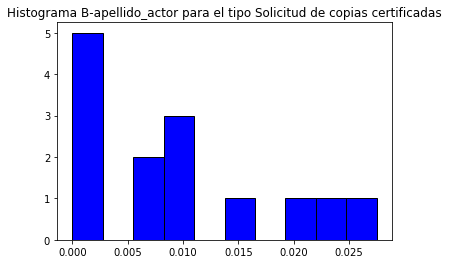

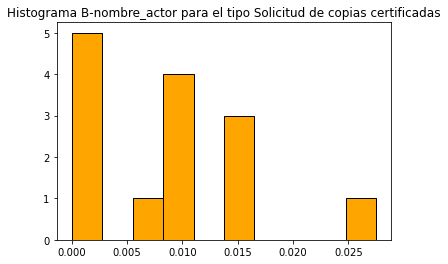

<Figure size 432x288 with 0 Axes>

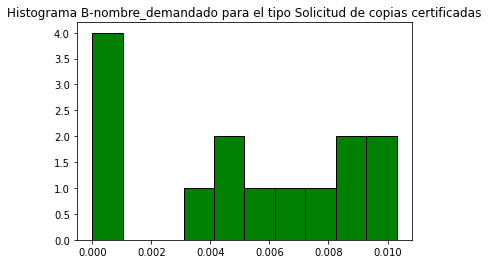

<Figure size 432x288 with 0 Axes>

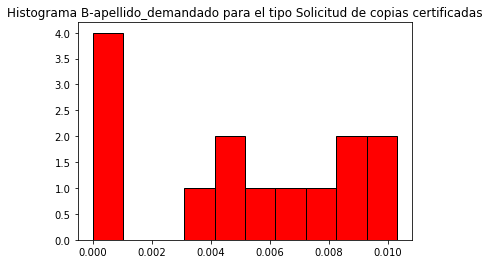

<Figure size 432x288 with 0 Axes>

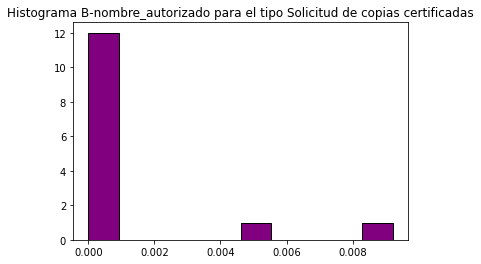

<Figure size 432x288 with 0 Axes>

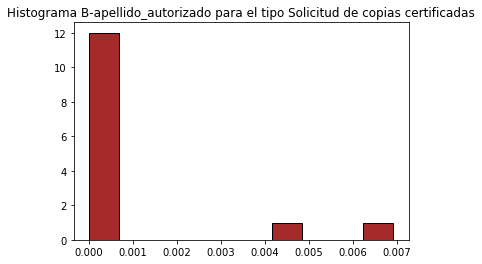

<Figure size 432x288 with 0 Axes>

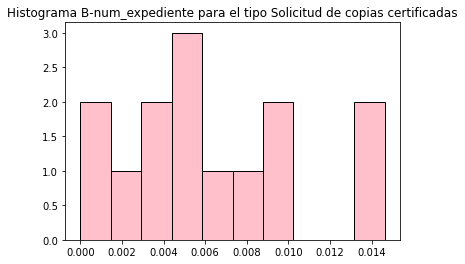

<Figure size 432x288 with 0 Axes>

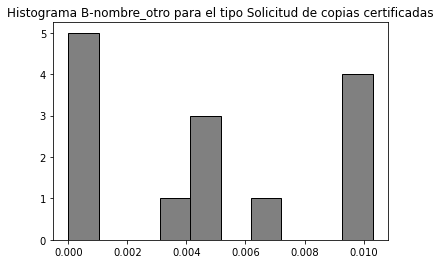

<Figure size 432x288 with 0 Axes>

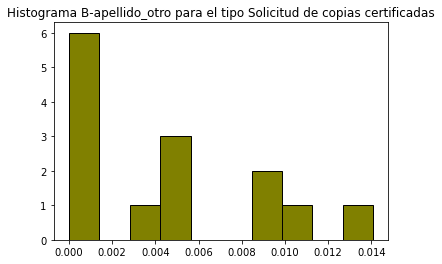

<Figure size 432x288 with 0 Axes>

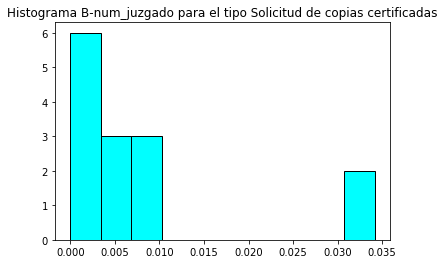

<Figure size 432x288 with 0 Axes>

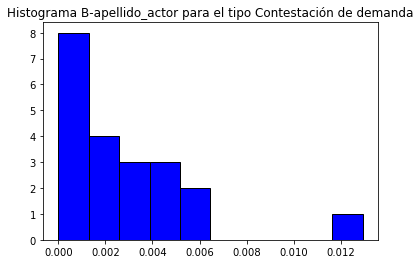

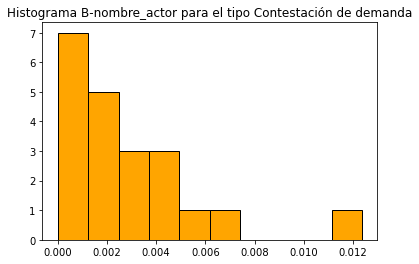

<Figure size 432x288 with 0 Axes>

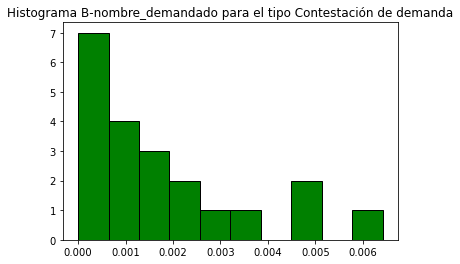

<Figure size 432x288 with 0 Axes>

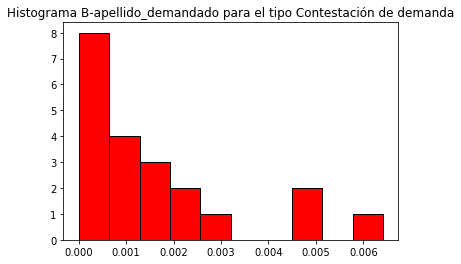

<Figure size 432x288 with 0 Axes>

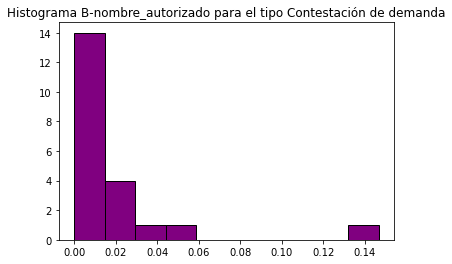

<Figure size 432x288 with 0 Axes>

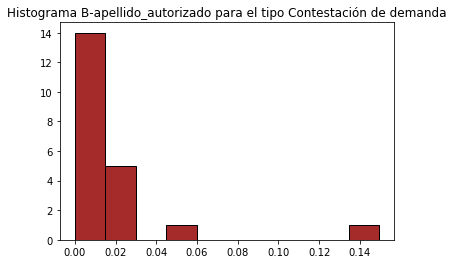

<Figure size 432x288 with 0 Axes>

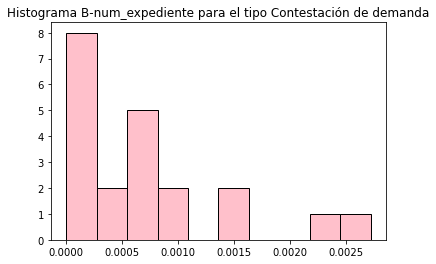

<Figure size 432x288 with 0 Axes>

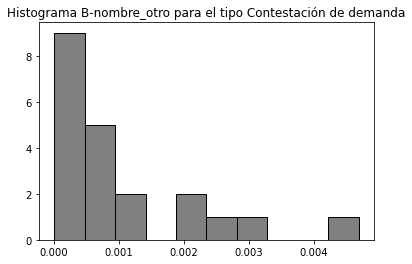

<Figure size 432x288 with 0 Axes>

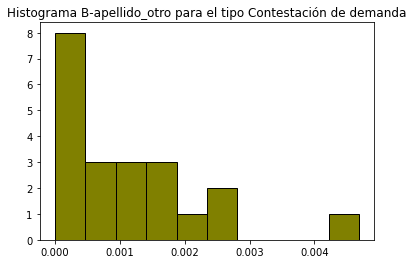

<Figure size 432x288 with 0 Axes>

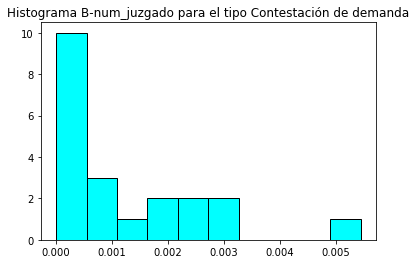

<Figure size 432x288 with 0 Axes>

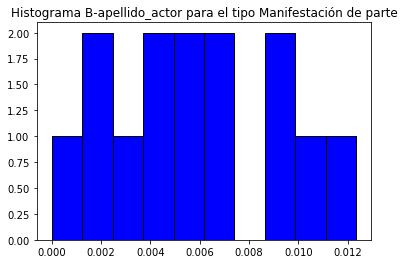

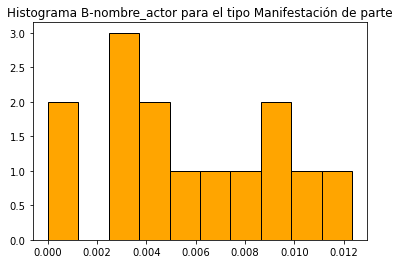

<Figure size 432x288 with 0 Axes>

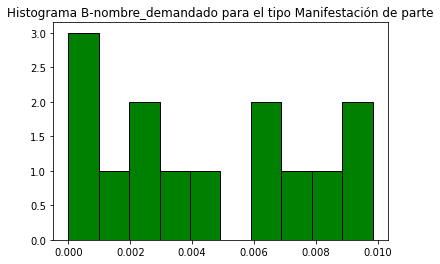

<Figure size 432x288 with 0 Axes>

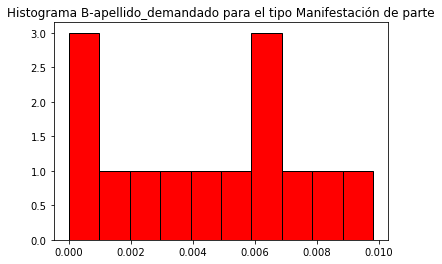

<Figure size 432x288 with 0 Axes>

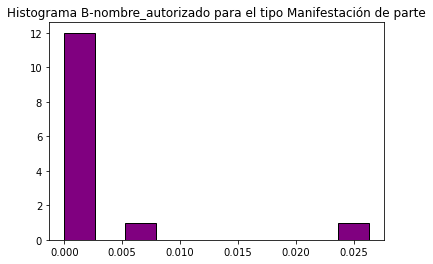

<Figure size 432x288 with 0 Axes>

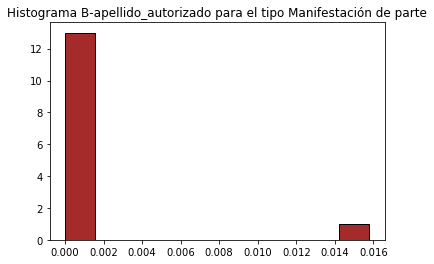

<Figure size 432x288 with 0 Axes>

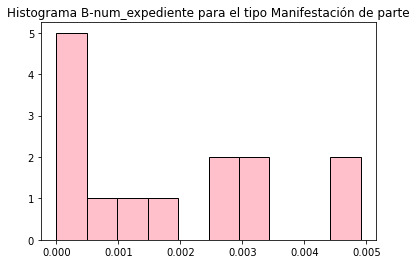

<Figure size 432x288 with 0 Axes>

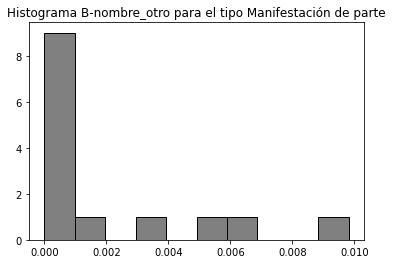

<Figure size 432x288 with 0 Axes>

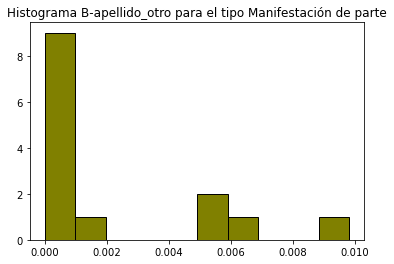

<Figure size 432x288 with 0 Axes>

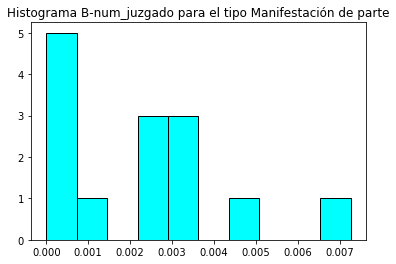

<Figure size 432x288 with 0 Axes>

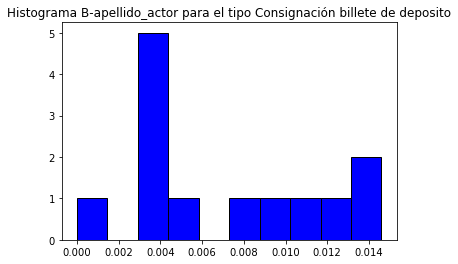

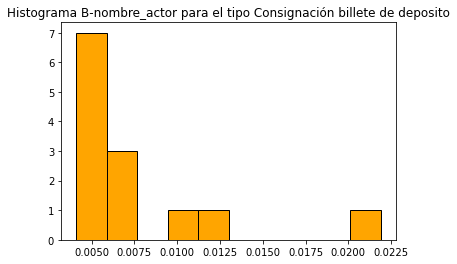

<Figure size 432x288 with 0 Axes>

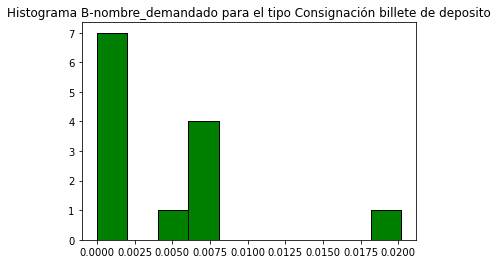

<Figure size 432x288 with 0 Axes>

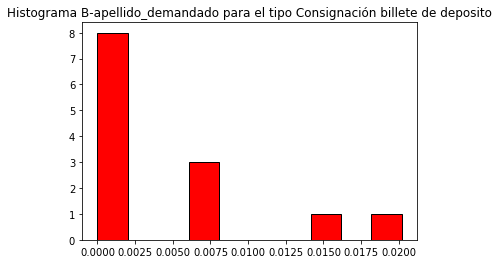

<Figure size 432x288 with 0 Axes>

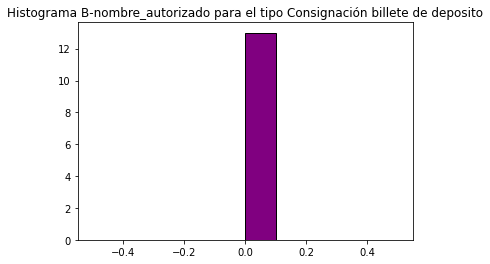

<Figure size 432x288 with 0 Axes>

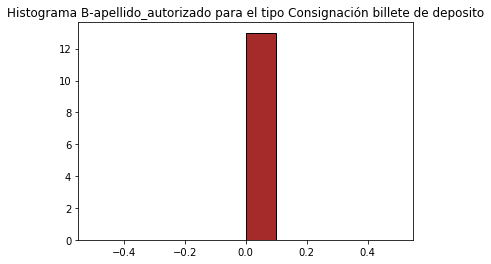

<Figure size 432x288 with 0 Axes>

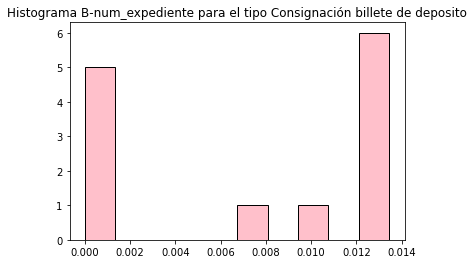

<Figure size 432x288 with 0 Axes>

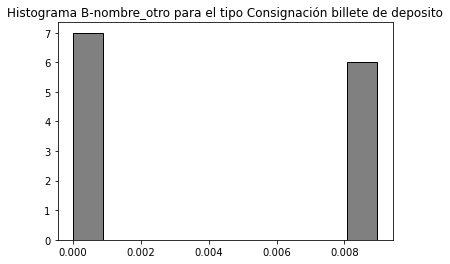

<Figure size 432x288 with 0 Axes>

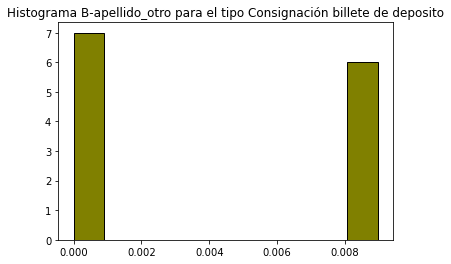

<Figure size 432x288 with 0 Axes>

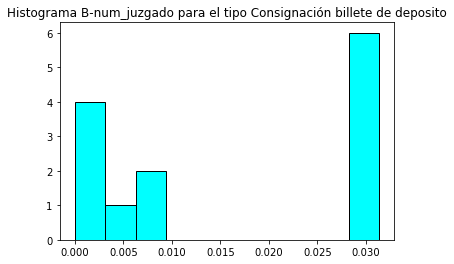

<Figure size 432x288 with 0 Axes>

In [7]:
# Creamos una lista con Las variables que utilizaremos para crear los histogramas
variable = [i for i in list(datos.columns) if i.startswith('B-')]
tipo = pd.unique(datos['type'])

# Creamos una lista con los 10 colores que queremos que tengan Los histogramas
colores=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Inicializamos una variable a utilizar para separar los histogramas
j = 0
# Inicializamos una variable a utilizar para asignar diferente color
k = 0

# Recorremos la lista de tipos y la lista de variables con dos ciclos for
for h in tipo:
    for i in variable:
        # Mandamos llamar la función
        crear_histograma(h, i, j, colores[k])
        j += 1
        k +=1
        plt.savefig(f"1-1-Exploracion_Normal/{i} - {h}")
        plt.show()
        plt.clf()
    j = 0
    k = 0

Visualmente, ciertas de las pares tipo-variable tienen una distribución que se parece a la normal. Sin embargo, lo necesitamos verificar de una forma más precisa.

## 3. Gráfico Quantile-Quantile

El segundo método que vamos a utilizar para ver si nuestros datos tienen una distribución normal es el gráfico quantile-quantile. 

### a. Definición de la función
Para obtenerlo, vamos a importar pylab y scipy.stats. Crearemos la función crear_quantile y dentro de esta función usaremos la función probplot de stats indicando la variable, el tipo de distribución que queremos probar, y que nos cree un gráfico.

In [8]:
import pylab
import scipy.stats as stats
def crear_quantile(tipo, variable, j):
    d_qq = datos[datos['type'].str.contains(tipo)]
    plt.figure(j)
    stats.probplot (d_qq[variable], dist='norm' ,plot=pylab)
    plt.title(f'Gráfico Q-Q {variable} - {tipo}')

### b. Llamar la función
Llamamos a la función crear_quantile enviandole como parametros el tipo de documento, el nombre de la variable y el número de figura.

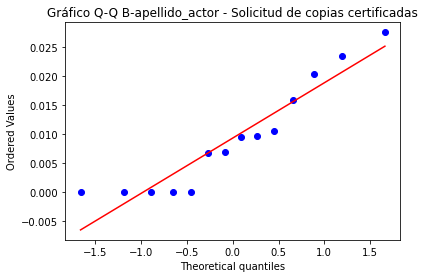

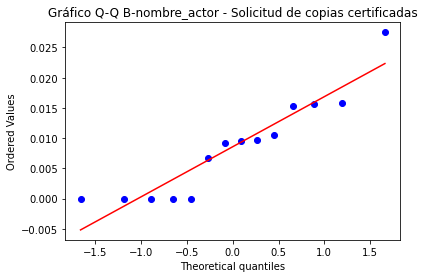

<Figure size 432x288 with 0 Axes>

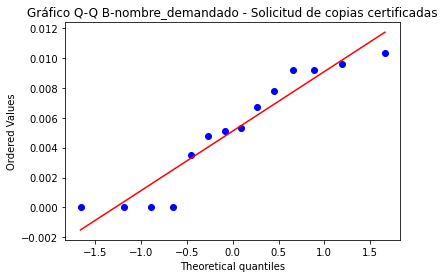

<Figure size 432x288 with 0 Axes>

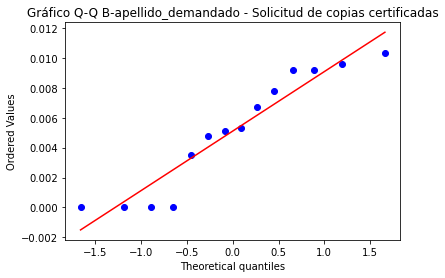

<Figure size 432x288 with 0 Axes>

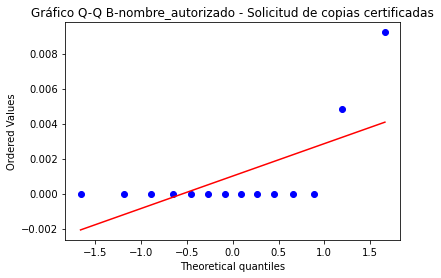

<Figure size 432x288 with 0 Axes>

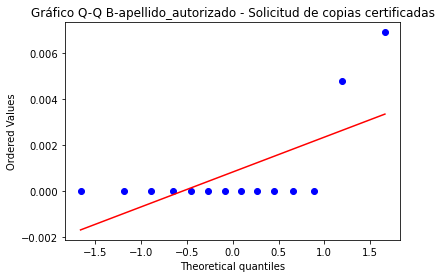

<Figure size 432x288 with 0 Axes>

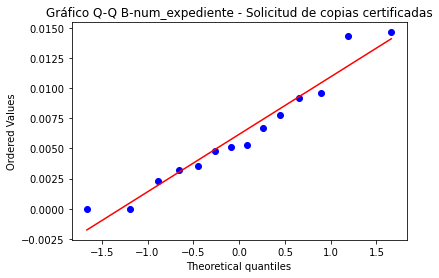

<Figure size 432x288 with 0 Axes>

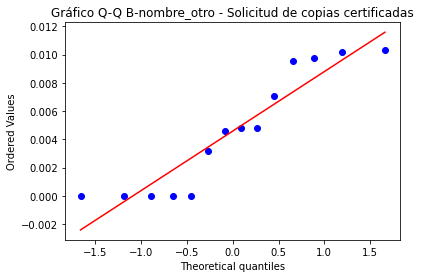

<Figure size 432x288 with 0 Axes>

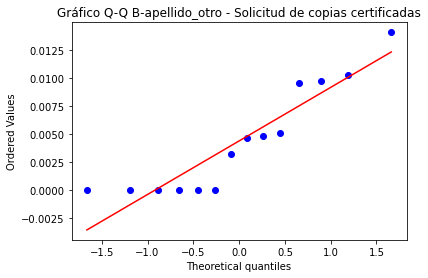

<Figure size 432x288 with 0 Axes>

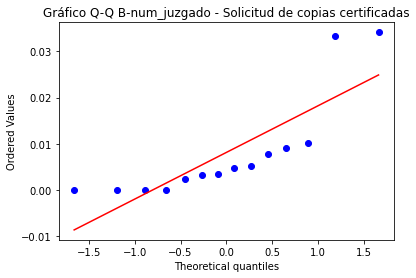

<Figure size 432x288 with 0 Axes>

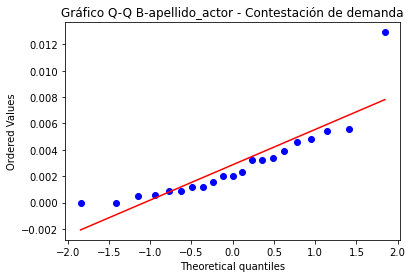

<Figure size 432x288 with 0 Axes>

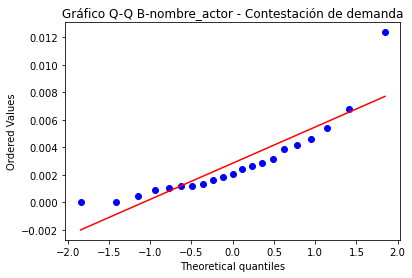

<Figure size 432x288 with 0 Axes>

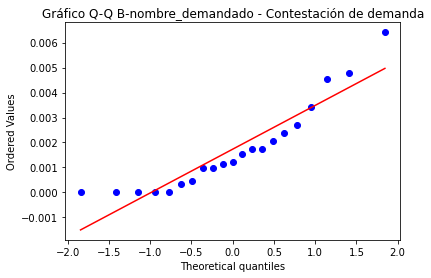

<Figure size 432x288 with 0 Axes>

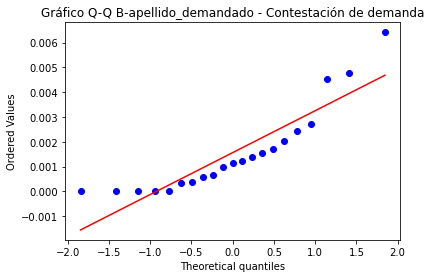

<Figure size 432x288 with 0 Axes>

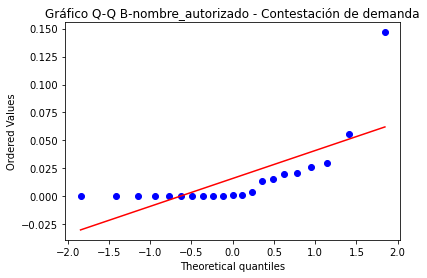

<Figure size 432x288 with 0 Axes>

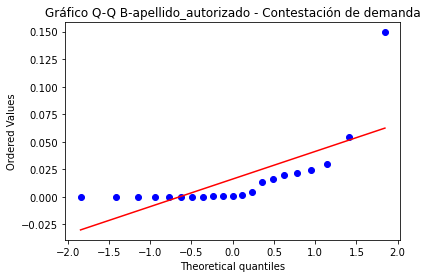

<Figure size 432x288 with 0 Axes>

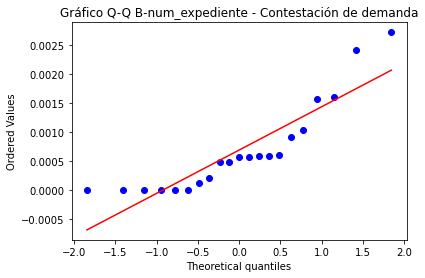

<Figure size 432x288 with 0 Axes>

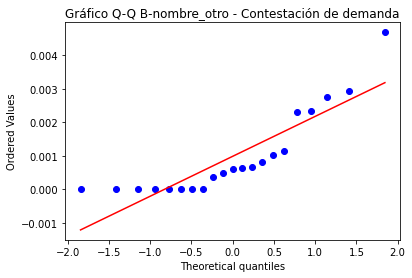

<Figure size 432x288 with 0 Axes>

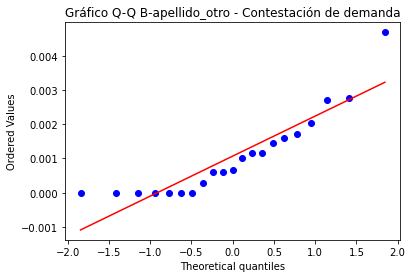

<Figure size 432x288 with 0 Axes>

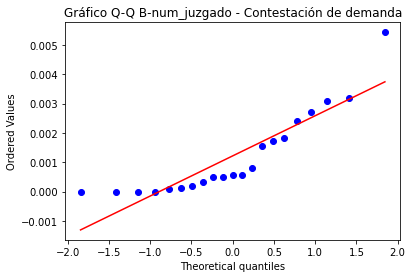

<Figure size 432x288 with 0 Axes>

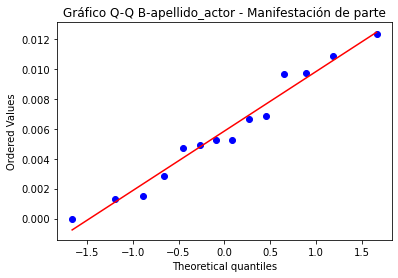

<Figure size 432x288 with 0 Axes>

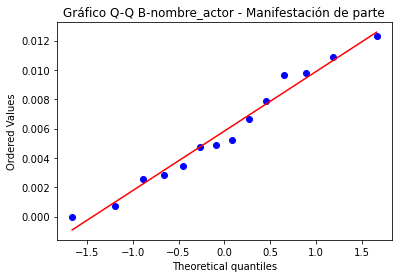

<Figure size 432x288 with 0 Axes>

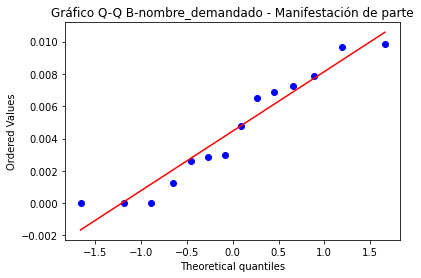

<Figure size 432x288 with 0 Axes>

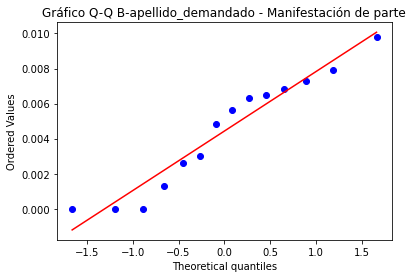

<Figure size 432x288 with 0 Axes>

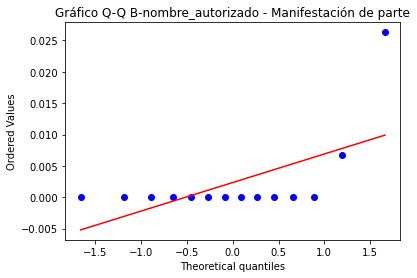

<Figure size 432x288 with 0 Axes>

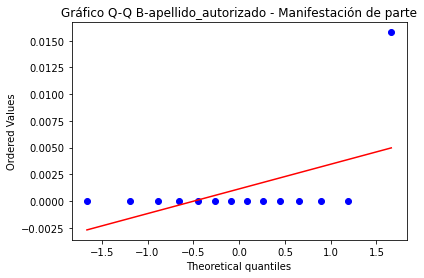

<Figure size 432x288 with 0 Axes>

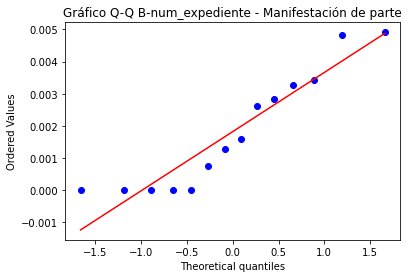

<Figure size 432x288 with 0 Axes>

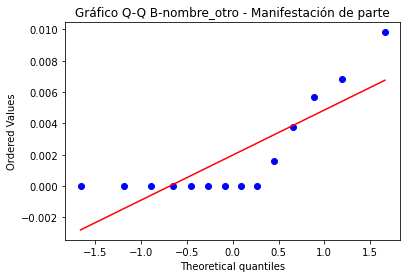

<Figure size 432x288 with 0 Axes>

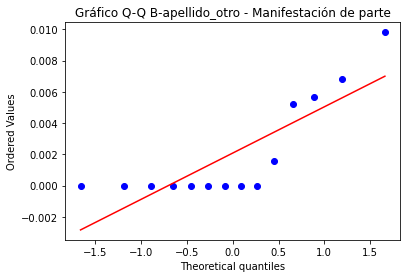

<Figure size 432x288 with 0 Axes>

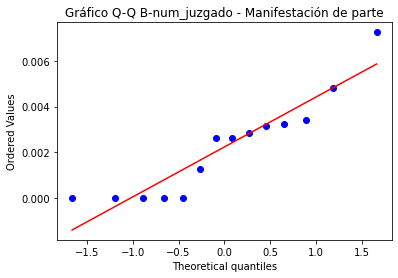

<Figure size 432x288 with 0 Axes>

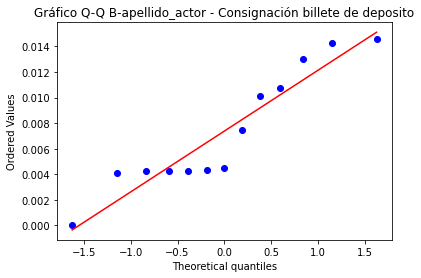

<Figure size 432x288 with 0 Axes>

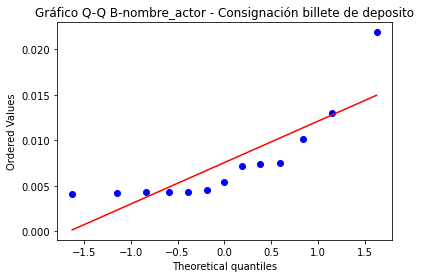

<Figure size 432x288 with 0 Axes>

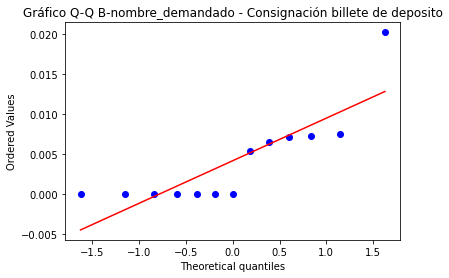

<Figure size 432x288 with 0 Axes>

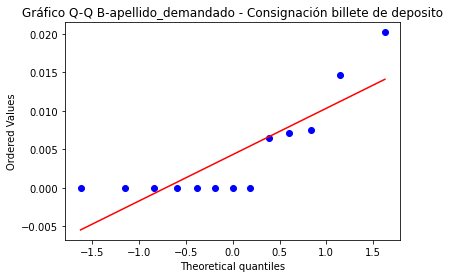

<Figure size 432x288 with 0 Axes>

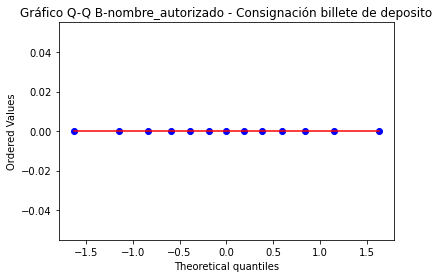

<Figure size 432x288 with 0 Axes>

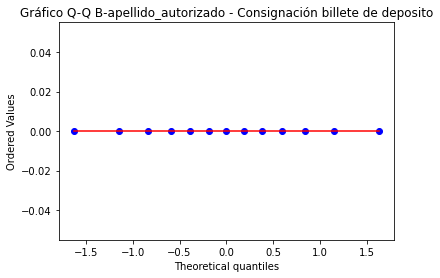

<Figure size 432x288 with 0 Axes>

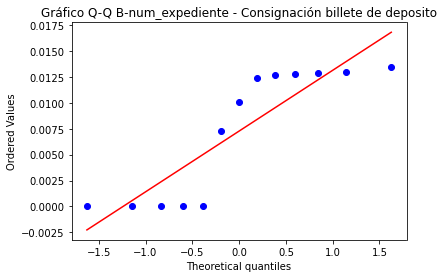

<Figure size 432x288 with 0 Axes>

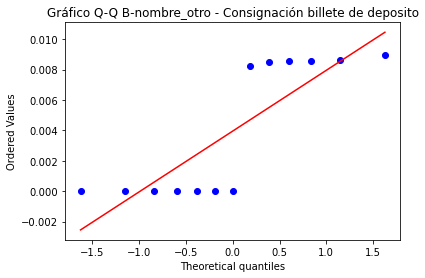

<Figure size 432x288 with 0 Axes>

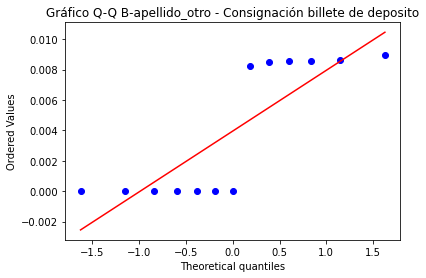

<Figure size 432x288 with 0 Axes>

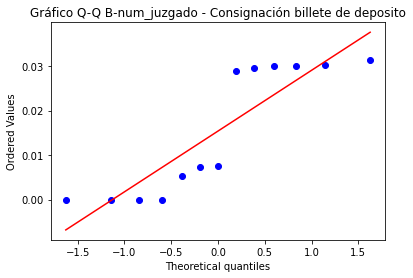

<Figure size 432x288 with 0 Axes>

In [9]:
# Inicializamos una variable a utilizar para separar Los histogramas
j = 0

# Recorremos la lista de tipos y la lista de variables con dos ciclos for
for h in tipo:
    for i in variable:
        crear_quantile(h, i, j)
        # Mandamos llamar la función y guardamos la gráfica
        j += 1
        plt.savefig(f"1-2-Gráfico Q-Q/{i} - {h}")
        plt.show()
        plt.clf()

Mientras más cercanos estén los puntos a la línea recta, más parecida será su distribución a la normal

## 4. Prueba Shapiro-Wilks
El estadístico es un valor calculado con nuestros datos y el p-value se obtiene de una tabla utilizando dicho estadístico. Si el p-value es mayor a 0.05, se asume que se trata de una distribución normal.

### a. Creación de la función
Utilizaremos la función shapiro de la librería scipy.stats

In [10]:
from scipy.stats import shapiro
def calcular_shapiro(tipo, variable):
    d_shapi = datos[datos['type'].str.contains(tipo)]
    estadistico, p_value = shapiro(d_shapi[variable])
    p_value = f'{p_value: .3f}'
    return p_value

### b. Llamar a la función

In [11]:
# Recorremos la lista de tipos y la lista de variables con dos ciclos for
conforme_norm = []
no_conforme_norm = []

for h in tipo:
    for i in variable:
        p_value = calcular_shapiro(h, i)
        if float(p_value) > 0.05:
            conforme_norm.append([h, i, p_value])
        else:
            no_conforme_norm.append([h,i, p_value])

print('\nLista de variables que se conforman con una distribución normal:\n')
n = 1
for i in conforme_norm:
    print(f'{n}. {i[0]} para {i[1]} que tiene un p-value de {i[2]}')
    n += 1

n = 1
print('\nLista de variables que NO se conforman con una distribución normal:\n')
for i in no_conforme_norm:
    print(f'{n}. {i[0]} para {i[1]} que tiene un p-value de {i[2]}')
    n += 1



Lista de variables que se conforman con una distribución normal:

1. Solicitud de copias certificadas para B-apellido_actor que tiene un p-value de  0.053
2. Solicitud de copias certificadas para B-nombre_actor que tiene un p-value de  0.052
3. Solicitud de copias certificadas para B-nombre_demandado que tiene un p-value de  0.061
4. Solicitud de copias certificadas para B-apellido_demandado que tiene un p-value de  0.061
5. Solicitud de copias certificadas para B-num_expediente que tiene un p-value de  0.390
6. Manifestación de parte para B-apellido_actor que tiene un p-value de  0.706
7. Manifestación de parte para B-nombre_actor que tiene un p-value de  0.761
8. Manifestación de parte para B-nombre_demandado que tiene un p-value de  0.175
9. Manifestación de parte para B-apellido_demandado que tiene un p-value de  0.237
10. Consignación billete de deposito para B-apellido_actor que tiene un p-value de  0.084
11. Consignación billete de deposito para B-nombre_autorizado que tiene un

## 5. Normalizando nuestros datos con transformación de Yeo-Johnson
Para lograr que nuestros datos tengan una distribución normal, existen varios métodos y usaremos la transformación de Yeo-Johnson, puesto que tenemos ciertos valores a 0 que no son posibles de tratar con una transformación de Box-Cox.

El aplicar el método de Yeo-Johnson no es garantía de que los datos adopten una distribución normal, por lo que es necesario volver a llevar a cabo las pruebas de normalidad para asegurar nos de haberlo logrado.

Esta transformación aplica la función que contiene la variable lamba, la cual tiene un valor que va de -5 a +5. Cuando lambda tine un valor igual a cero, aplica la función logaritmo a nuestros datos. Una vez que se tienen todos los valores nuevos, el método hace pruebas para ver cual valor de lambda que resultó ser el óptimo.

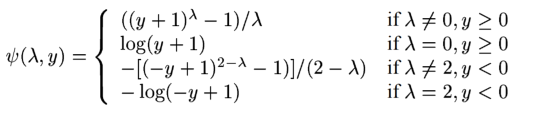

In [12]:
from IPython.display import Image
Image('1-3-Gráfico Yeo-Johnson/yeo-johnson.png')

1. El valor de lambda para Solicitud de copias certificadas - B-nombre_autorizado es de -980.1544049190165


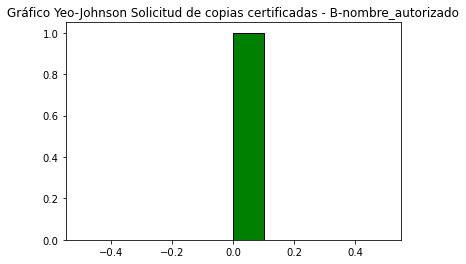

               0
count  14.000000
mean    0.000145
std     0.000369
min    -0.000000
25%     0.000000
50%    -0.000000
75%    -0.000000
max     0.001020
           0
0  -0.000000
1  -0.000000
2  -0.000000
3  -0.000000
4  -0.000000
5  -0.000000
6  -0.000000
7  -0.000000
8  -0.000000
9  -0.000000
10  0.001020
11 -0.000000
12 -0.000000
13  0.001011


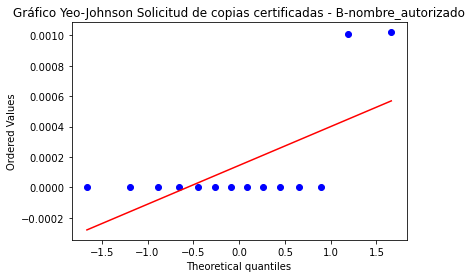

Estadistico =  0.429, p-value =  0.000
2. El valor de lambda para Solicitud de copias certificadas - B-apellido_autorizado es de -1185.1619144174585


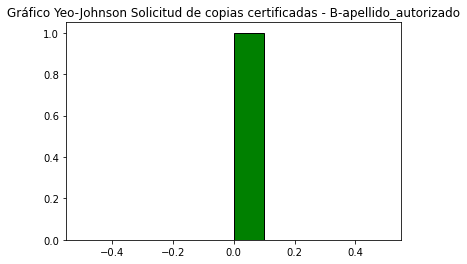

               0
count  14.000000
mean    0.000120
std     0.000306
min    -0.000000
25%     0.000000
50%    -0.000000
75%    -0.000000
max     0.000844
           0
0  -0.000000
1  -0.000000
2  -0.000000
3  -0.000000
4  -0.000000
5  -0.000000
6  -0.000000
7  -0.000000
8  -0.000000
9  -0.000000
10  0.000844
11 -0.000000
12 -0.000000
13  0.000841


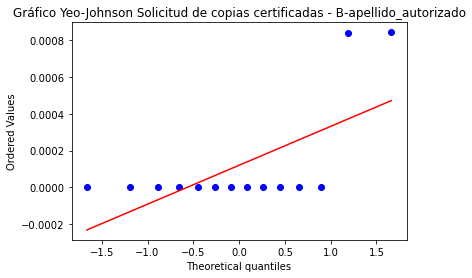

Estadistico =  0.429, p-value =  0.000
3. El valor de lambda para Solicitud de copias certificadas - B-nombre_otro es de -32.70933679168542


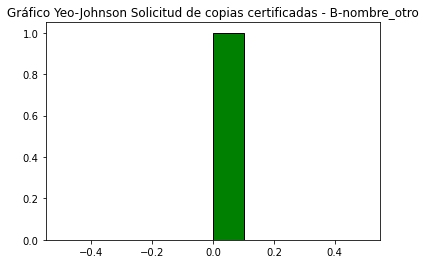

               0
count  14.000000
mean    0.004018
std     0.003575
min    -0.000000
25%     0.000000
50%     0.004344
75%     0.007680
max     0.008713
           0
0  -0.000000
1   0.008713
2   0.008318
3   0.008150
4   0.006270
5   0.003038
6   0.004419
7   0.008639
8  -0.000000
9  -0.000000
10  0.004269
11 -0.000000
12 -0.000000
13  0.004439


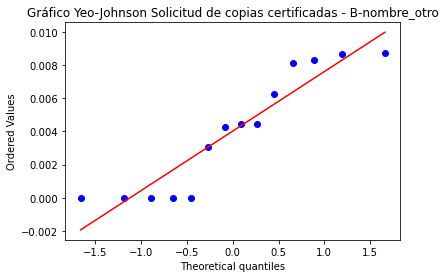

Estadistico =  0.844, p-value =  0.018
4. El valor de lambda para Solicitud de copias certificadas - B-apellido_otro es de -99.87126575993331


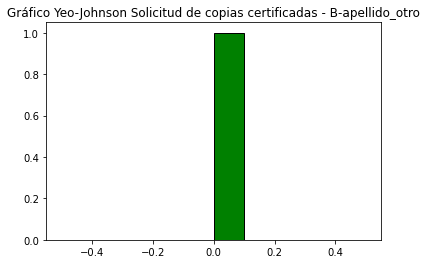

               0
count  14.000000
mean    0.002894
std     0.002887
min    -0.000000
25%     0.000000
50%     0.003213
75%     0.005593
max     0.007536
           0
0  -0.000000
1   0.006418
2   0.006216
3   0.006128
4   0.007536
5   0.002739
6   0.003797
7   0.003990
8  -0.000000
9  -0.000000
10  0.003687
11 -0.000000
12 -0.000000
13 -0.000000


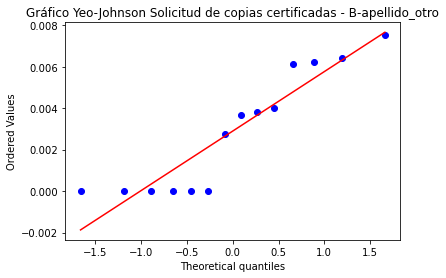

Estadistico =  0.835, p-value =  0.014
5. El valor de lambda para Solicitud de copias certificadas - B-num_juzgado es de -96.85055291787525


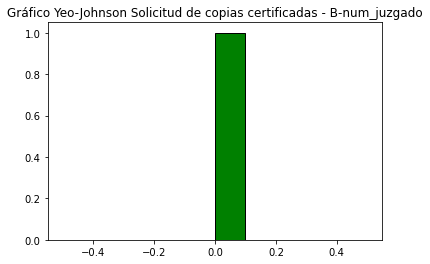

               0
count  14.000000
mean    0.003826
std     0.003423
min    -0.000000
25%     0.000516
50%     0.003401
75%     0.005913
max     0.009926
           0
0  -0.000000
1  -0.000000
2   0.009926
3   0.009894
4   0.002979
5   0.002752
6   0.003822
7   0.006463
8   0.004132
9   0.005466
10  0.002063
11 -0.000000
12  0.006062
13 -0.000000


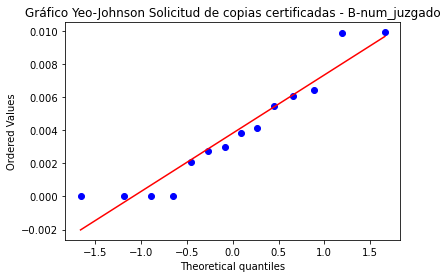

Estadistico =  0.902, p-value =  0.120
6. El valor de lambda para Contestación de demanda - B-apellido_actor es de -229.44626563485937


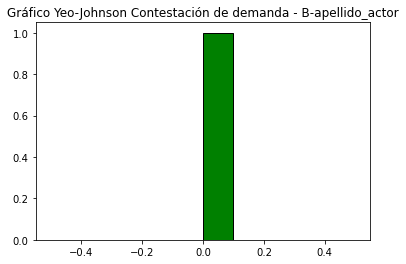

               0
count  21.000000
mean    0.001743
std     0.001137
min    -0.000000
25%     0.000819
50%     0.001634
75%     0.002587
max     0.004129
           0
0  -0.000000
1   0.001020
2  -0.000000
3   0.002268
4   0.000775
5   0.002587
6   0.001634
7   0.003102
8   0.000542
9   0.001312
10  0.001042
11  0.000461
12  0.002837
13  0.002260
14  0.001790
15  0.002345
16  0.001620
17  0.004129
18  0.000819
19  0.002916
20  0.003144


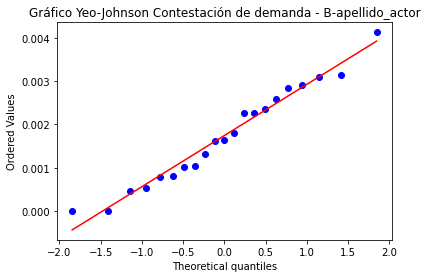

Estadistico =  0.967, p-value =  0.672
7. El valor de lambda para Contestación de demanda - B-nombre_actor es de -248.25155702810207


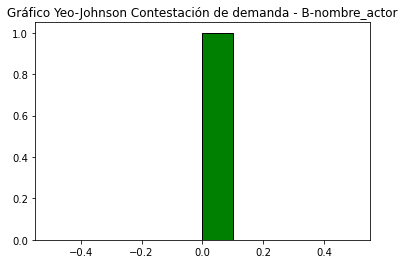

               0
count  21.000000
mean    0.001694
std     0.001045
min    -0.000000
25%     0.001005
50%     0.001605
75%     0.002478
max     0.003837
           0
0  -0.000000
1   0.001010
2  -0.000000
3   0.001810
4   0.000919
5   0.001925
6   0.001605
7   0.002979
8   0.001005
9   0.002172
10  0.001118
11  0.000459
12  0.002738
13  0.001316
14  0.002058
15  0.002478
16  0.001467
17  0.003837
18  0.000812
19  0.002601
20  0.003276


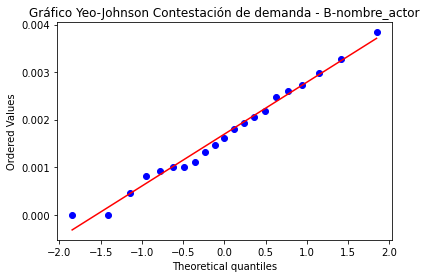

Estadistico =  0.980, p-value =  0.918
8. El valor de lambda para Contestación de demanda - B-nombre_demandado es de -333.7552648626912


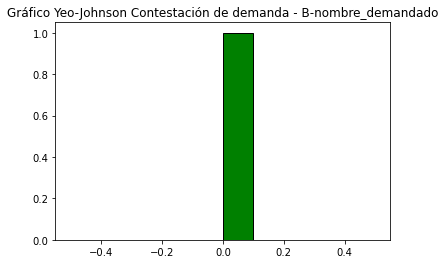

               0
count  21.000000
mean    0.001070
std     0.000858
min    -0.000000
25%     0.000310
50%     0.001000
75%     0.001647
max     0.002642
           0
0  -0.000000
1  -0.000000
2  -0.000000
3   0.002642
4   0.000439
5   0.000310
6   0.001483
7   0.001785
8  -0.000000
9  -0.000000
10  0.001209
11  0.002034
12  0.001310
13  0.002387
14  0.001314
15  0.000824
16  0.001000
17  0.000937
18  0.002334
19  0.000826
20  0.001647


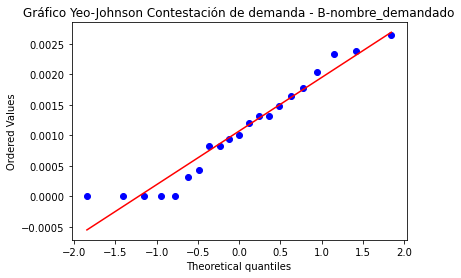

Estadistico =  0.929, p-value =  0.131
9. El valor de lambda para Contestación de demanda - B-apellido_demandado es de -419.79518656499084


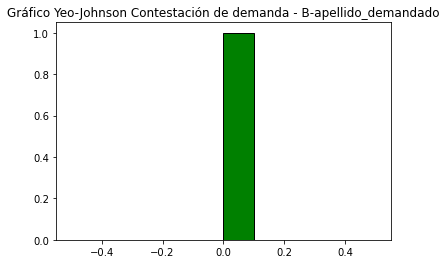

               0
count  21.000000
mean    0.000887
std     0.000730
min    -0.000000
25%     0.000306
50%     0.000895
75%     0.001373
max     0.002220
           0
0  -0.000000
1  -0.000000
2  -0.000000
3   0.002220
4   0.000351
5   0.000306
6   0.001373
7   0.001620
8  -0.000000
9  -0.000000
10  0.001138
11  0.001524
12  0.001226
13  0.002061
14  0.000512
15  0.000792
16  0.000952
17  0.000895
18  0.002026
19  0.000564
20  0.001056


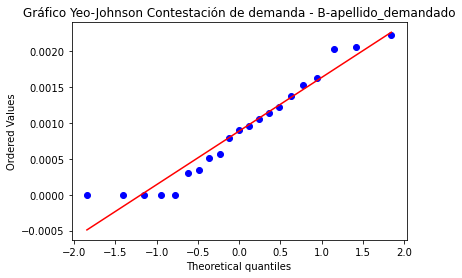

Estadistico =  0.925, p-value =  0.109
10. El valor de lambda para Contestación de demanda - B-nombre_autorizado es de -43.95143170197205


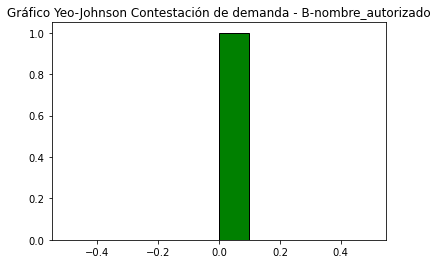

               0
count  21.000000
mean    0.006215
std     0.007920
min    -0.000000
25%     0.000000
50%     0.000991
75%     0.013271
max     0.022697
           0
0  -0.000000
1  -0.000000
2  -0.000000
3   0.016459
4   0.000469
5  -0.000000
6  -0.000000
7   0.022697
8   0.013560
9   0.001509
10  0.000119
11  0.003575
12  0.013271
13  0.020662
14  0.010322
15 -0.000000
16  0.000991
17  0.015515
18  0.011365
19 -0.000000
20 -0.000000


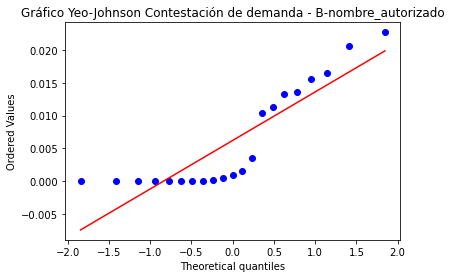

Estadistico =  0.772, p-value =  0.000
11. El valor de lambda para Contestación de demanda - B-apellido_autorizado es de -43.66783340102379


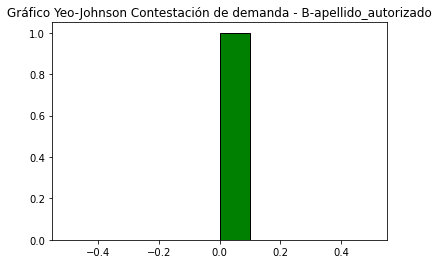

               0
count  21.000000
mean    0.006279
std     0.007896
min    -0.000000
25%     0.000000
50%     0.001002
75%     0.013303
max     0.022848
           0
0  -0.000000
1  -0.000000
2  -0.000000
3   0.016513
4   0.000469
5  -0.000000
6   0.001002
7   0.022848
8   0.014043
9   0.001509
10  0.000119
11  0.003982
12  0.013303
13  0.020618
14  0.010024
15 -0.000000
16  0.000797
17  0.015016
18  0.011610
19 -0.000000
20 -0.000000


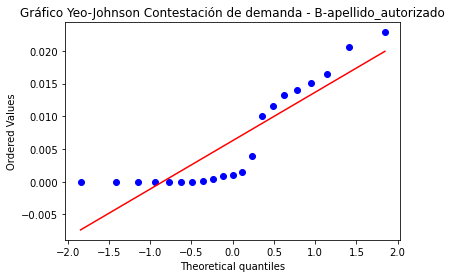

Estadistico =  0.778, p-value =  0.000
12. El valor de lambda para Contestación de demanda - B-num_expediente es de -917.7545188320331


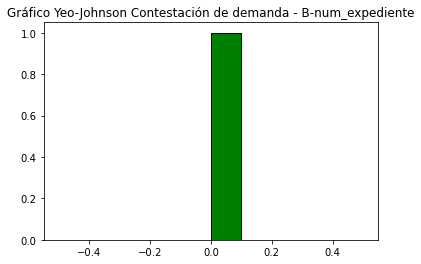

               0
count  21.000000
mean    0.000392
std     0.000337
min    -0.000000
25%     0.000000
50%     0.000439
75%     0.000615
max     0.000999
           0
0  -0.000000
1  -0.000000
2  -0.000000
3   0.000970
4  -0.000000
5  -0.000000
6   0.000664
7   0.000999
8   0.000449
9   0.000830
10  0.000113
11  0.000393
12  0.000447
13  0.000837
14  0.000448
15  0.000389
16  0.000466
17  0.000439
18  0.000615
19 -0.000000
20  0.000182


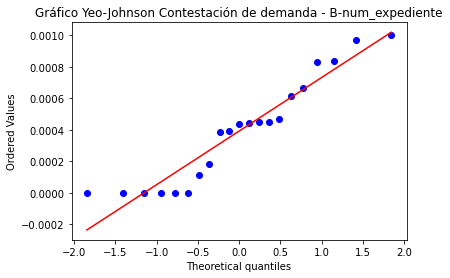

Estadistico =  0.897, p-value =  0.030
13. El valor de lambda para Contestación de demanda - B-nombre_otro es de -680.7073975143952


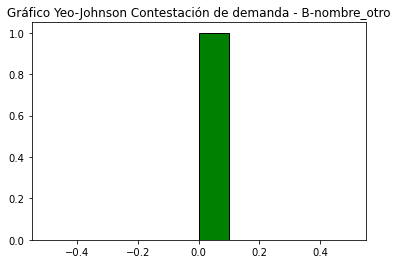

               0
count  21.000000
mean    0.000509
std     0.000502
min    -0.000000
25%     0.000000
50%     0.000491
75%     0.000799
max     0.001408
           0
0   0.001243
1   0.001167
2  -0.000000
3  -0.000000
4   0.000334
5   0.000528
6   0.000737
7  -0.000000
8  -0.000000
9   0.001408
10  0.000407
11  0.001268
12  0.001161
13 -0.000000
14  0.000799
15 -0.000000
16  0.000623
17 -0.000000
18 -0.000000
19  0.000521
20  0.000491


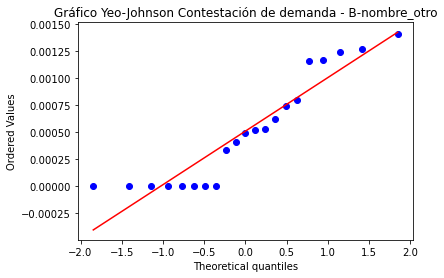

Estadistico =  0.857, p-value =  0.006
14. El valor de lambda para Contestación de demanda - B-apellido_otro es de -519.4737700379266


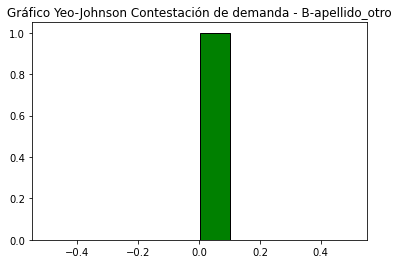

               0
count  21.000000
mean    0.000646
std     0.000580
min    -0.000000
25%     0.000000
50%     0.000555
75%     0.001091
max     0.001755
           0
0   0.001464
1   0.000872
2   0.001451
3  -0.000000
4   0.000265
5   0.000555
6   0.001260
7  -0.000000
8  -0.000000
9   0.001755
10  0.000512
11  0.001023
12  0.001138
13 -0.000000
14  0.000868
15 -0.000000
16  0.000788
17 -0.000000
18 -0.000000
19  0.001091
20  0.000514


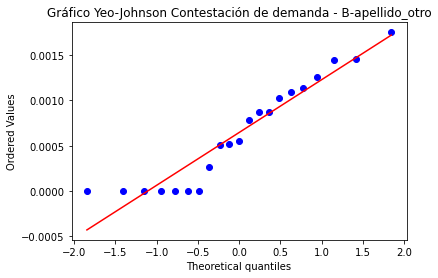

Estadistico =  0.895, p-value =  0.028
15. El valor de lambda para Contestación de demanda - B-num_juzgado es de -541.1127469607904


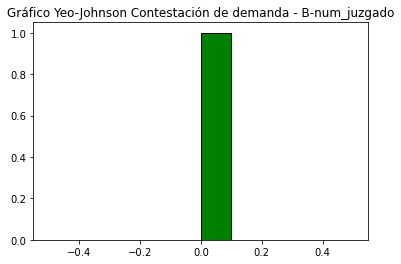

               0
count  21.000000
mean    0.000669
std     0.000599
min    -0.000000
25%     0.000115
50%     0.000484
75%     0.001155
max     0.001750
           0
0  -0.000000
1  -0.000000
2   0.001419
3   0.001345
4   0.000092
5  -0.000000
6   0.001497
7   0.001750
8   0.001125
9   0.001054
10  0.000115
11  0.000428
12  0.000494
13  0.001518
14 -0.000000
15  0.000424
16  0.000656
17  0.000484
18  0.001155
19  0.000296
20  0.000189


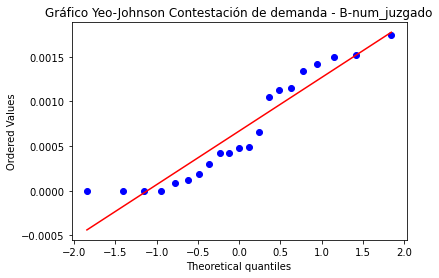

Estadistico =  0.885, p-value =  0.018
16. El valor de lambda para Manifestación de parte - B-nombre_autorizado es de -387.4116104753381


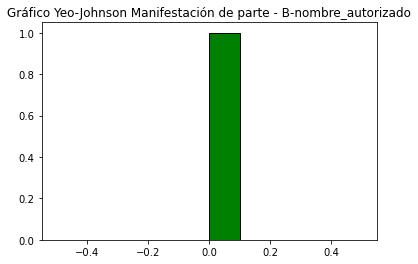

               0
count  14.000000
mean    0.000355
std     0.000902
min    -0.000000
25%     0.000000
50%    -0.000000
75%    -0.000000
max     0.002581
           0
0  -0.000000
1  -0.000000
2  -0.000000
3  -0.000000
4  -0.000000
5  -0.000000
6  -0.000000
7  -0.000000
8   0.002581
9  -0.000000
10 -0.000000
11  0.002385
12 -0.000000
13 -0.000000


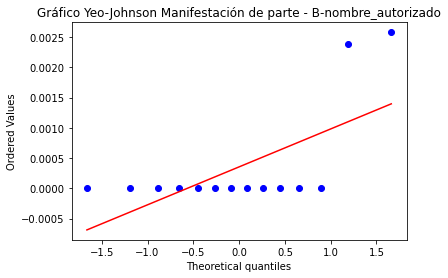

Estadistico =  0.435, p-value =  0.000
17. El valor de lambda para Manifestación de parte - B-apellido_autorizado es de -893.6379636056216


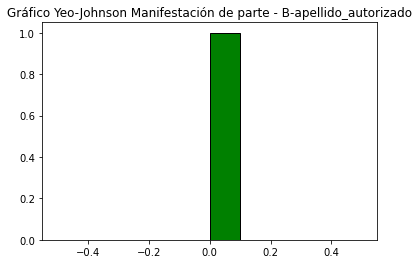

               0
count  14.000000
mean    0.000080
std     0.000299
min    -0.000000
25%     0.000000
50%    -0.000000
75%    -0.000000
max     0.001119
           0
0  -0.000000
1  -0.000000
2  -0.000000
3  -0.000000
4  -0.000000
5  -0.000000
6  -0.000000
7  -0.000000
8   0.001119
9  -0.000000
10 -0.000000
11 -0.000000
12 -0.000000
13 -0.000000


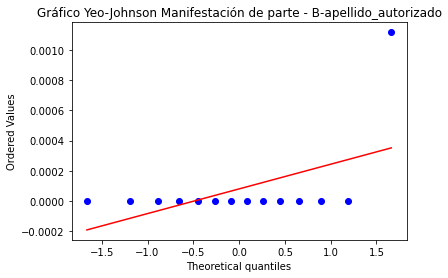

Estadistico =  0.297, p-value =  0.000
18. El valor de lambda para Manifestación de parte - B-num_expediente es de -190.3726780058937


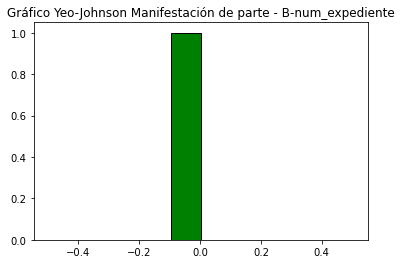

               0
count  14.000000
mean    0.001337
std     0.001238
min    -0.000000
25%     0.000000
50%     0.001247
75%     0.002365
max     0.003185
           0
0   0.003185
1  -0.000000
2  -0.000000
3   0.002185
4   0.000696
5   0.001129
6   0.002513
7  -0.000000
8   0.002068
9   0.002425
10  0.003154
11 -0.000000
12 -0.000000
13  0.001365


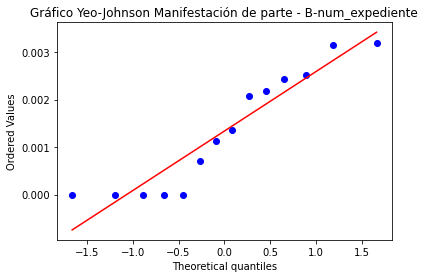

Estadistico =  0.865, p-value =  0.035
19. El valor de lambda para Manifestación de parte - B-nombre_otro es de -382.7861272797305


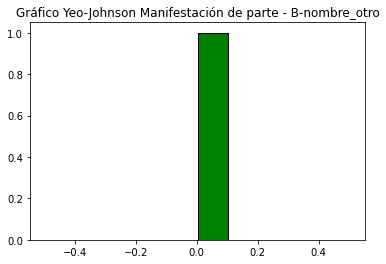

               0
count  14.000000
mean    0.000747
std     0.001083
min    -0.000000
25%     0.000000
50%    -0.000000
75%     0.001786
max     0.002550
           0
0   0.002550
1  -0.000000
2  -0.000000
3   0.002311
4   0.001986
5  -0.000000
6   0.002421
7  -0.000000
8  -0.000000
9  -0.000000
10 -0.000000
11 -0.000000
12 -0.000000
13  0.001186


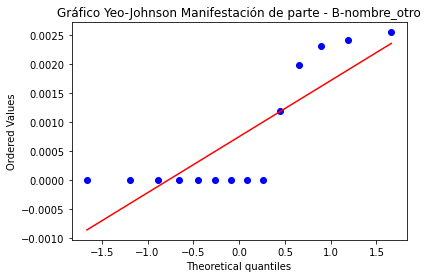

Estadistico =  0.678, p-value =  0.000
20. El valor de lambda para Manifestación de parte - B-apellido_otro es de -364.1182362585653


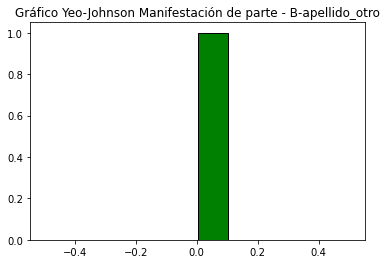

               0
count  14.000000
mean    0.000794
std     0.001152
min    -0.000000
25%     0.000000
50%    -0.000000
75%     0.002052
max     0.002668
           0
0   0.002668
1  -0.000000
2  -0.000000
3   0.002394
4   0.002336
5  -0.000000
6   0.002518
7  -0.000000
8  -0.000000
9  -0.000000
10 -0.000000
11 -0.000000
12 -0.000000
13  0.001202


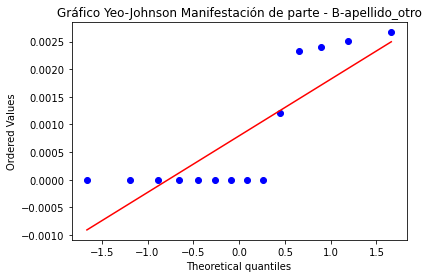

Estadistico =  0.668, p-value =  0.000
21. El valor de lambda para Manifestación de parte - B-num_juzgado es de -156.3934972150542


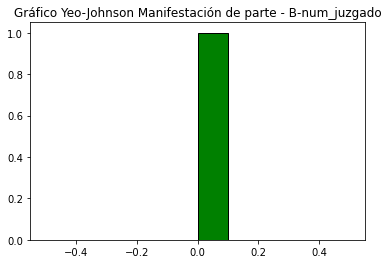

               0
count  14.000000
mean    0.001653
std     0.001454
min    -0.000000
25%     0.000000
50%     0.002148
75%     0.002535
max     0.004331
           0
0  -0.000000
1  -0.000000
2   0.004331
3   0.002283
4  -0.000000
5   0.001153
6   0.002648
7  -0.000000
8   0.002155
9   0.002549
10  0.003385
11 -0.000000
12  0.002141
13  0.002493


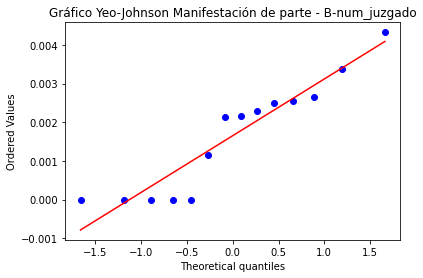

Estadistico =  0.874, p-value =  0.048
22. El valor de lambda para Consignación billete de deposito - B-nombre_actor es de -210.8304897394089


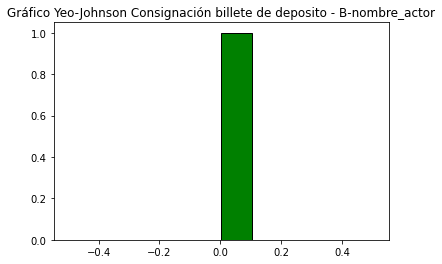

               0
count  13.000000
mean    0.003430
std     0.000691
min     0.002748
25%     0.002820
50%     0.003212
75%     0.003754
max     0.004694
           0
0   0.002813
1   0.002896
2   0.002820
3   0.002828
4   0.002748
5   0.002798
6   0.003685
7   0.004694
8   0.003212
9   0.004431
10  0.003742
11  0.003754
12  0.004173


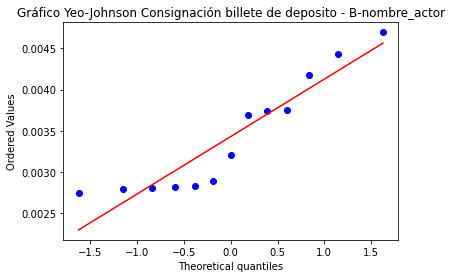

Estadistico =  0.857, p-value =  0.035
23. El valor de lambda para Consignación billete de deposito - B-nombre_demandado es de -135.40364501700952


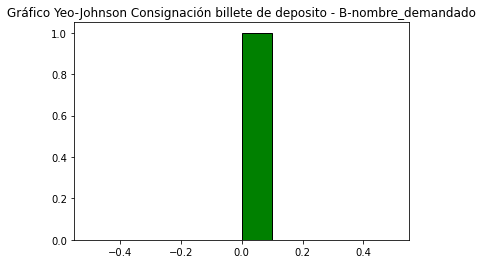

               0
count  13.000000
mean    0.002223
std     0.002592
min    -0.000000
25%     0.000000
50%     0.000000
75%     0.004568
max     0.006893
           0
0  -0.000000
1  -0.000000
2  -0.000000
3  -0.000000
4  -0.000000
5  -0.000000
6   0.004568
7   0.004627
8   0.003812
9   0.004311
10 -0.000000
11  0.004687
12  0.006893


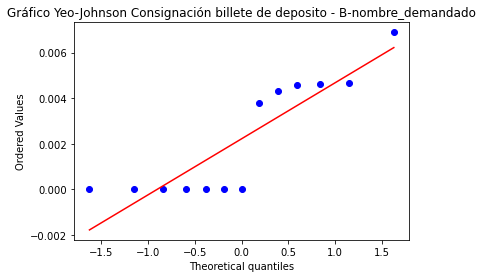

Estadistico =  0.760, p-value =  0.002
24. El valor de lambda para Consignación billete de deposito - B-apellido_demandado es de -155.77164968439092


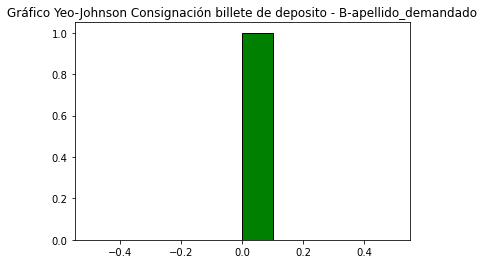

               0
count  13.000000
mean    0.001897
std     0.002556
min    -0.000000
25%     0.000000
50%     0.000000
75%     0.004301
max     0.006135
           0
0  -0.000000
1  -0.000000
2  -0.000000
3  -0.000000
4  -0.000000
5  -0.000000
6   0.004301
7   0.005748
8  -0.000000
9   0.004077
10 -0.000000
11  0.004403
12  0.006135


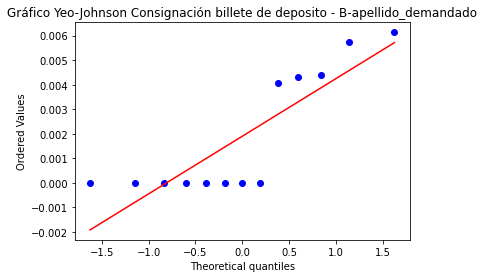

Estadistico =  0.707, p-value =  0.001
25. El valor de lambda para Consignación billete de deposito - B-num_expediente es de 62.5027317270052


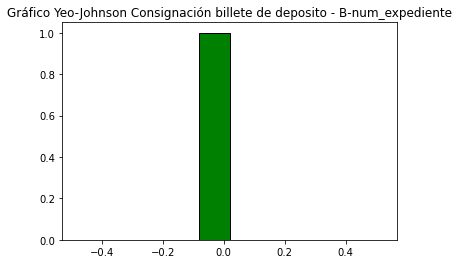

               0
count  13.000000
mean    0.010811
std     0.009396
min     0.000000
25%     0.000000
50%     0.013986
75%     0.019474
max     0.020885
           0
0   0.019474
1   0.020885
2   0.019594
3   0.019716
4   0.018449
5   0.019237
6   0.000000
7   0.009207
8   0.000000
9   0.000000
10  0.000000
11  0.000000
12  0.013986


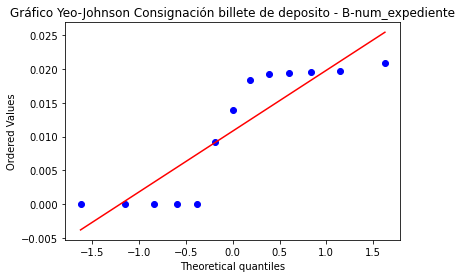

Estadistico =  0.762, p-value =  0.003
26. El valor de lambda para Consignación billete de deposito - B-nombre_otro es de -55.10479857391957


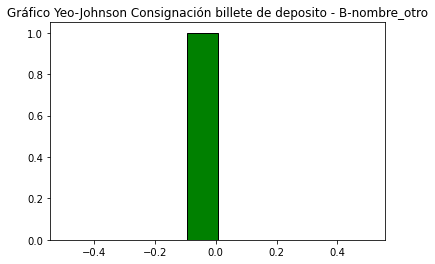

               0
count  13.000000
mean    0.003142
std     0.003534
min    -0.000000
25%     0.000000
50%     0.000000
75%     0.006794
max     0.007052
           0
0   0.006794
1   0.007052
2   0.006816
3   0.006839
4   0.006595
5   0.006749
6  -0.000000
7  -0.000000
8  -0.000000
9  -0.000000
10 -0.000000
11 -0.000000
12 -0.000000


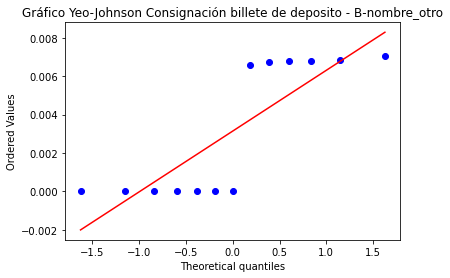

Estadistico =  0.662, p-value =  0.000
27. El valor de lambda para Consignación billete de deposito - B-apellido_otro es de -55.10479857391957


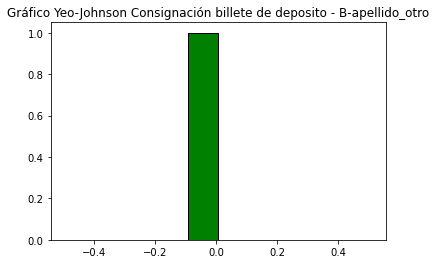

               0
count  13.000000
mean    0.003142
std     0.003534
min    -0.000000
25%     0.000000
50%     0.000000
75%     0.006794
max     0.007052
           0
0   0.006794
1   0.007052
2   0.006816
3   0.006839
4   0.006595
5   0.006749
6  -0.000000
7  -0.000000
8  -0.000000
9  -0.000000
10 -0.000000
11 -0.000000
12 -0.000000


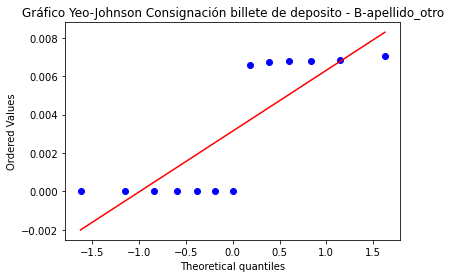

Estadistico =  0.662, p-value =  0.000
28. El valor de lambda para Consignación billete de deposito - B-num_juzgado es de -5.77529897278015


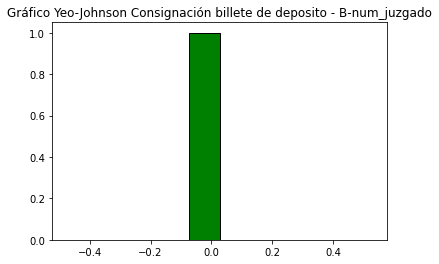

               0
count  13.000000
mean    0.014054
std     0.012896
min    -0.000000
25%     0.000000
50%     0.007278
75%     0.027103
max     0.028306
           0
0   0.027103
1   0.028306
2   0.027209
3   0.027314
4   0.026193
5   0.026896
6  -0.000000
7   0.007122
8   0.005280
9  -0.000000
10 -0.000000
11  0.007278
12 -0.000000


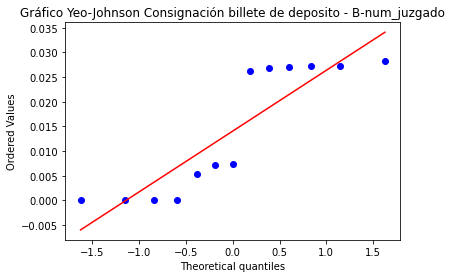

Estadistico =  0.756, p-value =  0.002


<Figure size 432x288 with 0 Axes>

In [13]:
from scipy import stats

normal_despues = []
not_normal = []
n = 1
for i in no_conforme_norm:
    datos_para_yeojohnson = datos[datos['type'].str.contains(i[0])]
    datos_para_yeojohnson = datos_para_yeojohnson[i[1]]
    datos_para_yeojohnson = datos[datos['type'].str.contains(i[0])]
    datos_norm_yeojonson, lambda_calc = stats.yeojohnson(datos_para_yeojohnson[i[1]])
    print(f'{n}. El valor de lambda para {i[0]} - {i[1]} es de {lambda_calc}')
    plt.hist(datos_norm_yeojonson[0], color='green', ec='black')
    plt.title(f'Gráfico Yeo-Johnson {i[0]} - {i[1]}')
    plt.savefig(f"1-3-Gráfico Yeo-Johnson/Histogramas/{i[0]} - {i[1]}")
    plt.show()
    plt.clf()
    if float(p_value) > 0.05:
        normal_despues.append([[i[0], i[1]], p_value, datos_norm_yeojonson])
    else:
        not_normal.append([[i[0], i[1]]])
    datos_norm_yeojonson = pd.DataFrame(datos_norm_yeojonson)
    print(datos_norm_yeojonson.describe())
    print(datos_norm_yeojonson)
    stats.probplot(datos_norm_yeojonson[0], dist='norm', plot=pylab)
    plt.title(f'Gráfico Yeo-Johnson {i[0]} - {i[1]}')
    pylab.savefig(f"1-3-Gráfico Yeo-Johnson/Q-Q/{i[0]} - {i[1]}")
    pylab.show()
    plt.clf()
    estadistico, p_value = shapiro(datos_norm_yeojonson[0])
    p_value = f'{p_value: .3f}'
    print (f'Estadistico = {float(estadistico): .3f}, p-value = {float(p_value): .3f}')
    n+=1

## 6. Recontrucción de la base de datos

a. Establecemos primero una tabla de correspondencia para evaluar los métodos de análisis de varianza que pueden aplicar según las distribuciones encontradas despues de la transformación:

- Si entre dos tipos de documentos, constatamos que las variables dependientes siguen una distribución normal

In [16]:
tabla_normalidad = {
    'NST':[],
    'NDT':[],
    'NN':[]
}

for i in conforme_norm:
    tabla_normalidad['NST'].append(i[:-1])

for i in normal_despues:
    tabla_normalidad['NDT'].append(i[0])

for i in not_normal:
    tabla_normalidad['NN'].append(i[0])

dict_correspondencia = {
    'ANOVA':{
        'type1':[],
        'type2':[],
        'var1':[],
        'var2':[],
        }, 
    'KRUSKAL_WALLIS':{
        'type1':[],
        'type2':[],
        'var1':[],
        'var2':[],
        }, 
    }
correspondencia = []
n = 1

for i in tabla_normalidad['NST']:
    for j in tabla_normalidad['NDT']:
        if i[1] in j[1]:
            correspondencia.append(f'{n}. {i} se puede comparar con {j} mediante ANOVA')
            n += 1

for i in tabla_normalidad['NST']:
    for j in tabla_normalidad['NN']:
        if i[1] in j[1]:
            correspondencia.append(f'{n}. {i} se puede comparar con {j} mediante KRUSKAL-WALLIS')
            n += 1

for i in tabla_normalidad['NDT']:
    for j in tabla_normalidad['NN']:
        if i[1] in j[1]:
            correspondencia.append(f'{n}. {i} se puede comparar con {j} mediante KRUSKAL-WALLIS')
            n += 1

correspondencia

["1. ['Solicitud de copias certificadas', 'B-apellido_actor'] se puede comparar con ['Contestación de demanda', 'B-apellido_actor'] mediante ANOVA",
 "2. ['Solicitud de copias certificadas', 'B-nombre_actor'] se puede comparar con ['Contestación de demanda', 'B-nombre_actor'] mediante ANOVA",
 "3. ['Solicitud de copias certificadas', 'B-nombre_demandado'] se puede comparar con ['Contestación de demanda', 'B-nombre_demandado'] mediante ANOVA",
 "4. ['Solicitud de copias certificadas', 'B-apellido_demandado'] se puede comparar con ['Contestación de demanda', 'B-apellido_demandado'] mediante ANOVA",
 "5. ['Manifestación de parte', 'B-apellido_actor'] se puede comparar con ['Contestación de demanda', 'B-apellido_actor'] mediante ANOVA",
 "6. ['Manifestación de parte', 'B-nombre_actor'] se puede comparar con ['Contestación de demanda', 'B-nombre_actor'] mediante ANOVA",
 "7. ['Manifestación de parte', 'B-nombre_demandado'] se puede comparar con ['Contestación de demanda', 'B-nombre_demandad

Complete data:

In [15]:
datos_transformed = {'type':[], 
                    'B-apellido_actor':[], 
                    'B-nombre_actor':[], 
                    'B-nombre_demandado':[], 
                    'B-apellido_demandado':[], 
                    'B-nombre_autorizado':[], 
                    'B-apellido_autorizado':[], 
                    'B-num_expediente':[], 
                    'B-nombre_otro':[], 
                    'B-apellido_otro':[], 
                    'B-num_juzgado':[]}
for h in tipo:
    for ind in datos.index:
        if datos['type'][ind] == h:
            datos_transformed['type'].append(h)
            for i in variable:
                
                norm = []
                for c in conforme_norm:
                    norm.append(c[:-1])
                if [h,i] in norm:
                    datos_transformed[i].append(datos[i][ind])
                
                for nn in not_normal:
                    if [h,i] in nn:
                        datos_transformed[i].append(datos[i][ind])
                
                for nd in normal_despues:
                    k = 0
                    if [h,i] in nd:
                        datos_transformed[i].append(list(nd[2])[k])
                        k+=1
                        
            

df_compl = pd.DataFrame(datos_transformed)
df_compl.to_excel('1_df_yeojohnson.xlsx')
datos.to_excel('1_datos_analisis.xlsx')

El problema de la transformación de Yeo-Johnson es que si bien ciertas distribuciones de las variables independientes aparecían como normal, eso era debido a una modificación demasiada abrupta de los datos que los dejaba en cero, por lo que los volvía imposible explotar con cualquier técnica (ver 'df_yeojohnson.xlsx')

No fue posible tampoco normalizar los datos con una transformación de Box-Cox que necesitaba valores estrictamente positivos, por lo que llegamos a la conclusión que tendremos que analizar la varianza de los datos iniciales ('datos_analisis.xlsx') con técnicas no paramétricas (Kruskal-Wallis), y sólamente llevar a cabo un análisis categórico de los datos con ANOVA para las variables que sí seguían una distribución normal sin transformación:

Manifestación de parte	Consignación billete de deposito	Apellido actor	ANOVA
Solicitud de copias certificadas	Manifestación de parte	Apellido actor	ANOVA
Solicitud de copias certificadas	Consignación billete de deposito	Apellido actor	ANOVA
Solicitud de copias certificadas	Manifestación de parte	Nombre actor	ANOVA
Solicitud de copias certificadas	Manifestación de parte	Nombre demandado	ANOVA

Podemos también notar que las variables 'nombre_autorizado' y 'apellido_autorizado' están a cero para todas las muestras de Consignación billete de deposito, por lo cual no será relevante llevar a cabo un análisis paramétrico o no paramétrico para compararlas con otros documentos.